<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Group-Name" data-toc-modified-id="Group-Name-1">Group Name</a></span></li><li><span><a href="#Student-Names" data-toc-modified-id="Student-Names-2">Student Names</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-3">Load Data</a></span></li><li><span><a href="#Data-Cleaning-and-Feature-Engineering" data-toc-modified-id="Data-Cleaning-and-Feature-Engineering-4">Data Cleaning and Feature Engineering</a></span></li><li><span><a href="#Initial-fit-for-linear-regression,-l1,-l2-and-random-forest-and-cross-validation" data-toc-modified-id="Initial-fit-for-linear-regression,-l1,-l2-and-random-forest-and-cross-validation-5">Initial fit for linear regression, l1, l2 and random forest and cross validation</a></span></li><li><span><a href="#Random-Forest-Hyperparameter-Tuning-and-Random-Search" data-toc-modified-id="Random-Forest-Hyperparameter-Tuning-and-Random-Search-6">Random Forest Hyperparameter Tuning and Random Search</a></span></li><li><span><a href="#Evaluation-Metric" data-toc-modified-id="Evaluation-Metric-7">Evaluation Metric</a></span><ul class="toc-item"><li><span><a href="#Random-Forest-model" data-toc-modified-id="Random-Forest-model-7.1">Random Forest model</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-7.2">Visualization</a></span></li></ul></li></ul></div>

Group Name
-----

 Random_Forest_Elves


Student Names
----

1. Shirley Li
2. Jingxian Li 
3. Michael Schulze
4. Mundy Reimer

Load Data
-----

In [33]:
reset -fs

In [5]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor


from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.pyplot as plt 

In [6]:
df = pd.read_csv('fixed_cocaine_listings.csv')

In [7]:
df.head()

,Unnamed: 0,product_title,ships_from_to,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,escrow,product_link,...,ships_to_SE,ships_from_SE,ships_to_CO,ships_from_CO,ships_to_CN,ships_from_CN,ships_to_PL,ships_from_PL,ships_to_GR,ships_from_GR
0,2841,5KG Bolivian Cocaine 92%,"EU → EU, WW",5000.0,92.0,51.50,0.010300,0.011196,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
1,4607,✯3kg FLAKES COCAINE 92% ✯GA✯,"NL → WW, US",3000.0,92.0,43.20,0.014400,0.015652,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
2,3407,COCAINE - 2 KILOGRAM - COLOMBIAN - 89% PURE,"DE → WW, AU",2000.0,89.0,38.60,0.019300,0.021685,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
3,2026,2KG Colombian Cocaine 90%,"EU → EU, WW",2000.0,90.0,30.40,0.015200,0.016889,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
4,4606,✯2kg FLAKES COCAINE 92% ✯GA✯,"NL → WW, US",2000.0,92.0,29.89,0.014945,0.016245,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False


Data Cleaning and Feature Engineering
-----

In [10]:
# Split predictors and response, do log transformation on gram and convert all True False to 1 and 0.
y = df.btc_price
df_b = df.drop("btc_price", axis=1)
df_b = df_b.drop(["cost_per_gram_pure", "Unnamed: 0", "product_title", "ships_from_to", "cost_per_gram",
                    "product_link", "vendor_link", "vendor_name", "ships_from", "ships_to", 
                    "ships_to_GR", "ships_from_GR", "ships_to_PL", "ships_from_PL", "ships_to_CO", 
                    "ships_from_CO", "ships_to_SE", "ships_from_SE", "ships_to_S. America", 
                    "ships_from_S. America", "ships_from_DK", "ships_to_DK", "ships_to_CN", "ships_to_CZ", 
                    "ships_to_BR", "ships_to_IT", "ships_from_SI", "ships_to_BE", "ships_from_N. America", 
                    "ships_to_ES", "ships_to_CH", "ships_from_CH", "ships_from_CZ", "ships_from_CN", 
                    "ships_to_WW", "ships_to_DE"], axis=1)
df_b = df_b * 1
df_b["grams"] = np.log(df_b["grams"])
y = np.log(y)
df_b.head()

,grams,quality,escrow,successful_transactions,rating,ships_to_US,ships_from_US,ships_to_NL,ships_from_NL,ships_to_FR,...,ships_from_AU,ships_to_EU,ships_from_EU,ships_from_ES,ships_to_N. America,ships_from_BE,ships_from_WW,ships_to_SI,ships_from_IT,ships_from_BR
0,8.517193,92.0,0,100,4.96,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,8.006368,92.0,0,360,4.86,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,7.600902,89.0,1,70,5.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7.600902,90.0,0,100,4.96,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
4,7.600902,92.0,0,360,4.86,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Extract key words from product title for feature engineering
df_b.loc[df.product_title.str.replace("\s", "")\
                            .str.contains('[iI][nN][tT][rR][oO]|[pP][rR][oO][mM][oO]|[sS][aA][mM][pP][lL][eE]'), "intro"] = 1
df_b.loc[~df.product_title.str.replace("\s", "")\
                            .str.contains('[iI][nN][tT][rR][oO]|[pP][rR][oO][mM][oO]|[sS][aA][mM][pP][lL][eE]'), "intro"] = 0


df_b.loc[df.product_title.str.replace("\s", "").str.contains('[cC][oO][lL][oO][mM][bB][iI][aA]'), "colombia"] = 1
df_b.loc[~df.product_title.str.replace("\s", "").str.contains('[cC][oO][lL][oO][mM][bB][iI][aA]'), "colombia"] = 0


df_b.loc[df.product_title.str.replace("\s", "").str.contains('[pP][eE][rR][uU]'), "peru"] = 1
df_b.loc[~df.product_title.str.replace("\s", "").str.contains('[pP][eE][rR][uU]'), "peru"] = 0


df_b.loc[df.product_title.str.replace("\s", "").str.contains('[bB][oO][lL][iI][vV][iI][aA]'), "bolivia"] = 1
df_b.loc[~df.product_title.str.replace("\s", "").str.contains('[bB][oO][lL][iI][vV][iI][aA]'), "bolivia"] = 0


df_b["caps"] = df.product_title.str.findall(r'[A-Z]').str.len()/df.product_title.str.len()


df_b.loc[df.product_title.str.replace("\s", "")\
                            .str.contains('[fF][rR][eE][eE][sS][hH][iI][pP]'), "free_ship"] = 1
df_b.loc[~df.product_title.str.replace("\s", "")\
                             .str.contains('[fF][rR][eE][eE][sS][hH][iI][pP]'), "free_ship"] = 0


df_b.loc[df.product_title.str.replace("\s", "").str.contains('[uU][nN][cC][uU][tT]'), "uncut"] = 1
df_b.loc[~df.product_title.str.replace("\s", "").str.contains('[uU][nN][cC][uU][tT]'), "uncut"] = 0


df_b.loc[df.product_title.str.replace("\s", "").str.contains('[fF][iI][sS][hH]'), "fish_cut"] = 1
df_b.loc[~df.product_title.str.replace("\s", "").str.contains('[fF][iI][sS][hH]'), "fish_cut"] = 0


df_b.loc[df.product_title.str.replace("\s", "").str.contains('[bB][rR][iI][cC][kK]'), "brick"] = 1
df_b.loc[~df.product_title.str.replace("\s", "").str.contains('[bB][rR][iI][cC][kK]'), "brick"] = 0


df_b.loc[df.product_title.str.replace("\s", "").str.contains('[cC][rR][aA][cC][kK]'), "crack"] = 1
df_b.loc[~df.product_title.str.replace("\s", "").str.contains('[cC][rR][aA][cC][kK]'), "crack"] = 0

df_b.loc[df.product_title.str.replace("\s", "").str.contains('[cC][rR][yY][sS][tT][aA][lL]'), "crystal"] = 1
df_b.loc[~df.product_title.str.replace("\s", "").str.contains('[cC][rR][yY][sS][tT][aA][lL]'), "crystal"] = 0

df_b.loc[df.product_title.str.replace("\s", "").str.contains('[fF][lL][aA][kK][eE]'), "flake"] = 1
df_b.loc[~df.product_title.str.replace("\s", "").str.contains('[fF][lL][aA][kK][eE]'), "flake"] = 0

df_b.loc[df.product_title.str.replace("\s", "").str.contains('[pP][uU][rR][eE]'), "pure"] = 1
df_b.loc[~df.product_title.str.replace("\s", "").str.contains('[pP][uU][rR][eE]'), "pure"] = 0

df_b.head()

,grams,quality,escrow,successful_transactions,rating,ships_to_US,ships_from_US,ships_to_NL,ships_from_NL,ships_to_FR,...,bolivia,caps,free_ship,uncut,fish_cut,brick,crack,crystal,flake,pure
0,8.517193,92.0,0,100,4.96,0,0,0,0,0,...,1.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8.006368,92.0,0,360,4.86,1,0,0,1,0,...,0.0,0.535714,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7.600902,89.0,1,70,5.00,0,0,0,0,0,...,0.0,0.651163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7.600902,90.0,0,100,4.96,0,0,0,0,0,...,0.0,0.160000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.600902,92.0,0,360,4.86,1,0,0,1,0,...,0.0,0.535714,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(df_b, y, test_size=0.2)

Initial fit for linear regression, l1, l2 and random forest and cross validation
----

In [84]:
print("Cross Validation Score")
pipelines = [LinearRegression(),
             linear_model.Lasso(),
             linear_model.Ridge(),
             RandomForestRegressor(criterion='mae',n_estimators = 150,max_depth = 5 )]

for pipe in pipelines:
    pipe.fit(X_train,y_train)
    name = pipe.__class__.__name__.split('.')[-1]
    cv_medae = cross_val_score(pipe, X_train,y_train, scoring = 'neg_median_absolute_error', cv =5)
    cv_score = cross_val_score(pipe, X_train,y_train, scoring = 'r2', cv =5)
    print(f"{name}")
    print(f"Average cross validation R^2: {cv_score.mean():.4}")
    print(f"{cv_score}")
    print(f"Average cross validation Medae: {medae.mean():.4}")
    print(f"{cv_medae}",end = "\n\n")

Cross Validation Score
LinearRegression
Average cross validation R^2: 0.9256
[0.86214859 0.91009561 0.97264427 0.96753297 0.91548707]
Average cross validation Medae: -0.1251
[-0.12560057 -0.11797855 -0.12296631 -0.13176809 -0.11926671]

Lasso
Average cross validation R^2: 0.826
[0.76569778 0.80380535 0.8717857  0.8783471  0.81045226]
Average cross validation Medae: -0.1251
[-0.42355463 -0.40180277 -0.36474627 -0.3981018  -0.39873957]

Ridge
Average cross validation R^2: 0.9261
[0.86277472 0.90973907 0.973529   0.96903701 0.91548602]
Average cross validation Medae: -0.1251
[-0.12399137 -0.11887019 -0.12213628 -0.13770461 -0.12299979]

RandomForestRegressor
Average cross validation R^2: 0.917
[0.85311354 0.89644818 0.96361637 0.96336798 0.90864439]
Average cross validation Medae: -0.1251
[-0.14434622 -0.13861844 -0.15038418 -0.15753239 -0.14545931]



Random Forest Hyperparameter Tuning and Random Search
----

In [ ]:
cv = 5
n_iter = 20

In [ ]:
hyperparameters = dict(n_estimators=range(10, 200),
                       max_depth=range(3, 12))
clf_random_cv = RandomizedSearchCV(RandomForestRegressor(
    criterion='mae', random_state=42), hyperparameters, cv=cv, n_iter=n_iter)

In [ ]:
clf_random_cv.fit(X_train, y_train)

Evaluation Metric
----

In [82]:
pred_train = np.exp(lm.predict(X_train))
pred_test = np.exp(lm.predict(X_test))
y_test = np.exp(y_test)
y_train = np.exp(y_train)
X_test["grams"] = np.exp(X_test["grams"])
X_train["grams"] = np.exp(X_train["grams"])

NameError: name 'lm' is not defined

In [13]:
medae_value = metrics.median_absolute_error(y_train, pred_train)
print(f"{medae_value:.4f} medae on training set")

0.0167 medae on training set


In [14]:
medae_value = metrics.median_absolute_error(y_test, pred_test)
print(f"{medae_value:.4f} medae on test set")

0.0200 medae on test set


In [15]:
for x,y in zip(list(df_b.columns), lm.coef_):
    if abs(y) < 0.05:
        print(x,y)

quality 0.0061435950316482395
escrow -0.01643773431781098
successful_transactions 2.7725408864988842e-05
ships_to_FR 0.017022026418674164
ships_to_EU 0.023903223255218167
colombia 0.011849250180284808
peru 0.02608334002643929
bolivia -0.017398393006424186
pure 0.02689287992639675


In [16]:
for x,y in zip(list(df_b.columns), lm.coef_):
    if abs(y) >= 0.5:
        print(x,y)

grams 0.9285995392948383
ships_from_GB 0.5023228857970421
ships_from_AU 1.222976083635337


In [17]:
count = 0
for x,y,z in zip(y_train, pred_train, X_train.iterrows()):
    if abs(x - y) > 5:
        print(z)
        print(df.iloc[z[0]][1])
        print(x, y)
        count += 1
print()
print(count)

(2, grams                      2000.000000
quality                      89.000000
escrow                        1.000000
successful_transactions      70.000000
rating                        5.000000
ships_to_US                   0.000000
ships_from_US                 0.000000
ships_to_NL                   0.000000
ships_from_NL                 0.000000
ships_to_FR                   0.000000
ships_from_FR                 0.000000
ships_to_GB                   0.000000
ships_from_GB                 0.000000
ships_to_CA                   0.000000
ships_from_CA                 0.000000
ships_from_DE                 1.000000
ships_to_AU                   1.000000
ships_from_AU                 0.000000
ships_to_EU                   0.000000
ships_from_EU                 0.000000
ships_from_ES                 0.000000
ships_to_N. America           0.000000
ships_from_BE                 0.000000
ships_from_WW                 0.000000
ships_to_SI                   0.000000
ships_from_IT        

In [18]:
count = 0
for x,y,z in zip(y_test, pred_test, X_test.iterrows()):
    if abs(x - y) > 5:
        print(z)
        print(df.iloc[z[0]][1])
        print(x, y)
        count += 1
print()
print(count)

(8, grams                      1000.000000
quality                      91.000000
escrow                        0.000000
successful_transactions     310.000000
rating                        4.740000
ships_to_US                   0.000000
ships_from_US                 0.000000
ships_to_NL                   0.000000
ships_from_NL                 1.000000
ships_to_FR                   0.000000
ships_from_FR                 0.000000
ships_to_GB                   0.000000
ships_from_GB                 0.000000
ships_to_CA                   0.000000
ships_from_CA                 0.000000
ships_from_DE                 0.000000
ships_to_AU                   0.000000
ships_from_AU                 0.000000
ships_to_EU                   0.000000
ships_from_EU                 0.000000
ships_from_ES                 0.000000
ships_to_N. America           0.000000
ships_from_BE                 0.000000
ships_from_WW                 0.000000
ships_to_SI                   0.000000
ships_from_IT        

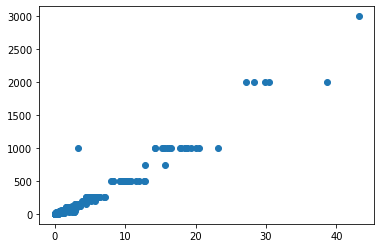

In [19]:
plt.scatter(y_train, X_train["grams"])
plt.show()

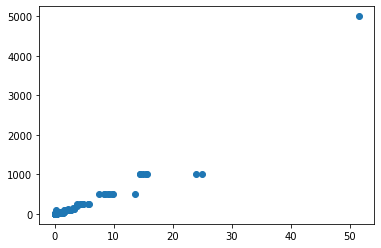

In [20]:
plt.scatter(y_test, X_test["grams"])

### Random Forest model

In [21]:
rf = RandomForestRegressor(criterion='mae',n_estimators = 150,max_depth = 5 ) # TODO: Replace with your choice of algorithm and hyperparameters 
rf.fit(X_train, y_train) # Train model

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=150,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [22]:
medae_value = metrics.median_absolute_error(y_train, rf.predict(X_train))
print(f"{medae_value:.4f} medae on training set")

0.0216 medae on training set


In [23]:
rf.score(X_train, y_train)

0.9900281393789219

In [24]:
medae_value = metrics.median_absolute_error(y_test, rf.predict(X_test))
print(f"{medae_value:.4f} medae on test set")

0.0242 medae on test set


In [25]:
rf.score(X_test, y_test) 

0.9190326704963591

In [26]:
cv=5
n_iter=20

In [27]:
"""
Steps:
1. Define Estimator
2. Define hyperparameter search space
3. Instantiate RandomizedSearchCV
"""
hyperparameters = dict(n_estimators = range(10,200),
                       max_depth = range(3,12))
clf_random_cv = RandomizedSearchCV(RandomForestRegressor(criterion='mae',random_state = 42), hyperparameters, cv=cv, n_iter=n_iter)


In [28]:
clf_random_cv.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
medae_value = metrics.median_absolute_error(y_train, clf_random_cv.predict(X_train))
print(f"{medae_value:.4f} medae on training set")

In [ ]:
rf.score(X_test, y_test) 

### Visualization

In [38]:
%load_ext rpy2.ipython
%R library(ggplot2)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


ValueError: Buffer for this type not yet supported.

In [38]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('data_keywords.csv')
data.head()

FileNotFoundError: [Errno 2] File b'data_keywords.csv' does not exist: b'data_keywords.csv'

In [30]:
y = data.btc_price
X = data.drop("btc_price", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lm = LinearRegression() 
lm.fit(X_train, y_train)

NameError: name 'data' is not defined

In [ ]:
df = pd.read_csv('fixed_cocaine_listings.csv')
df.head()

In [ ]:
df['ship_from'] = df.ships_from_to.str[:2]
df.head()

In [ ]:
ship_from = df.groupby('ship_from').agg({'btc_price': ['mean', 'count']}).reset_index()
ship_from = pd.concat([ship_from['ship_from'],ship_from['btc_price']], axis=1)
ship_from.loc[ship_from['count']<5, 'count_less_than_5'] = 'Yes'
ship_from.loc[ship_from['count']>=5, 'count_less_than_5'] = 'No'
ship_from = ship_from.sort_values('mean', ascending=False)
ship_from

In [ ]:
%R -i ship_from

In [ ]:
%%R -w 10 -h 5 --units in -r 300
ggplot(data=ship_from) + 
geom_bar(aes(x=reorder(ship_from, -mean), y=mean, fill=count_less_than_5), stat="identity")+
theme_bw() + 
theme(text = element_text(family = 'Avenir Next'),
      axis.ticks = element_blank(),
      panel.border = element_blank(),
      panel.grid = element_blank(),
      legend.position="bottom",
      legend.title = element_text(size = 10)) +
xlab("Ship From Which Country") + ylab("mean of price")

In [ ]:
col_lst = list(data.columns[-13:])
col_lst.append('escrow')
col_lst.remove('caps')
col_lst

In [ ]:
def plot_avg_price(col_name):
    new_dataset = data.groupby(col_name).mean()['btc_price'].reset_index()
    new_dataset.plot(x=col_name, y='btc_price', kind='bar', legend=False, figsize=(2,5))
    plt.show()

In [ ]:
for col in col_lst:
    plot_avg_price(col)